# Introduction to Pandas

[pandas](https://pandas.pydata.org/) is the primary Python library for doing basic data analysis. If you are a data scientist, much of your life will be spent manipulating data in pandas. pandas provides a nice layering on top of NumPy to make data analysis much easier. In particular, the primary data structure, the **DataFrame** provides labels for both the rows and the columns. This makes for much easier access to the elements within.

### Iowa Housing Dataset
We will use the [Iowa Housing Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) from Kaggle, a dataset of ~1500 homes in Ames, Iowa, with fields like the Sale Price, Area of floors, No. of rooms, Sale Date etc. Make sure to check out the [data description file](datasets/iowa_housing_data_description.txt) to get an idea of the kind of fields included in the dataset.

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9.0, 5.0)

import matplotlib.pyplot as plt
# It's a convention to import pandas as pd
import pandas as pd

pd.set_option('display.width', 1000)

In [2]:
# Create a DataFrame by reading in a csv file
data = pd.read_csv('datasets/iowa_housing.csv')
# Like Numpy arrays, DataFrames have a 'shape' (# of rows, # of columns)
print(data.shape)

# Show the first few rows of the DataFrame
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Components of the DataFrame
The vast majority of an analysis takes place inside a DataFrame. There are three components to a DataFrame, the **index**, the **columns** and the **data** or **values**. The index labels the rows, the column names label the columns and the data are the actual values that we manipulate during an analysis.

![dataframe_anatomy](images/dataframe_anatomy.png)

In [3]:
# There are 3 main components of a DataFrame
#   1. The index - tells us how to locate ("index into") rows (axis 0).
#   2. The columns - tell us how to locate ("index into") columns (axis 1).
#   3. The values - the data itself

print(data.index)     # An Index object that allows for fast searching
print(data.columns)   # An Index object that allows for fast searching
print(data.values)    # Note: What is the type of the 'values'? A numpy array!

RangeIndex(start=0, stop=1460, step=1)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3S

In [4]:
# We can ask the DataFrame to 'describe' itself to get a general idea about the column ranges
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Getting a subset of the columns of the DataFrame
data[['LotArea', 'GrLivArea', 'SalePrice']]

,LotArea,GrLivArea,SalePrice
Id,,,
1,8450,1710,208500
2,9600,1262,181500
3,11250,1786,223500
4,9550,1717,140000
5,14260,2198,250000
6,14115,1362,143000
7,10084,1694,307000
8,10382,2090,200000
9,6120,1774,129900


## Selecting Single Column of Data - A Series
Each column of data may be selected with the indexing operator [] and a passed string name. A pandas **Series** is a single dimensional data structure with an index and values. It has no columns.

In [8]:
# Grab single columns
sale_price = data['SalePrice']
print(type(sale_price))
sale_price.head(10)

<class 'pandas.core.series.Series'>


Id
1     208500
2     181500
3     223500
4     140000
5     250000
6     143000
7     307000
8     200000
9     129900
10    118000
Name: SalePrice, dtype: int64

## Plotting directly from pandas
DataFrames conveniently provide a plot method to directly plot without using matplotlib.

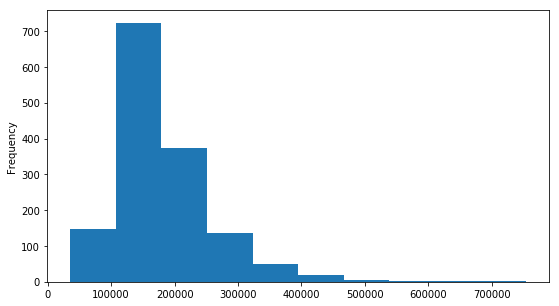

In [11]:
# Plot a histogram of SalePrice data
data['SalePrice'].plot(kind='hist')

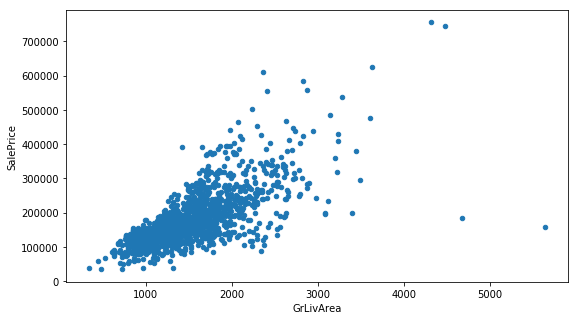

In [12]:
# Plot a Scatter plot of GrLivArea (Living Area over grade) vs. the Sale Price
data.plot(kind='scatter', x='GrLivArea', y='SalePrice')